# Locally linear embedding (LLE)

**LITERATURA**

1. Nonlinear Dimensionality
Reduction by
Locally Linear Embedding, Roweis and Saul

2. Algorithms for manifold learning, Lawrence Cayton






## Algoritam

*Locally linear embedding* je isto jedan od ranijih algoritama. $M$ pokušavamo rekonstruirati iz $x_1,...,x_n\in\mathbb{R}^D$ pomoću linearnih komadića (lokalnog linearnog smještenja).

Preciznije, svaki $x_i$ pokušavamo zapisati kao konveksnu kombinaciju njegovih najbližih $k$ susjeda: $x_i=\sum_jw_jx_j$, gdje suma ide po najbližim susjedima i $\sum_jw_j=1$. Intuitivno, $x_i$ leži u politopu generiranom s njegovih $k$ susjeda.

Cilj nam je dakle odabrati težine $w_{ij}$ tako da je $\sum_i\left|\vert x_i-\sum_jw_{ij}x_j\vert\right|$ minimalan te je zadovoljeno:
* $\sum_{j}w_{ij}=1$
* $w_{ij}=0$ ako $x_j$ nije jedan od $k$ najbližih susjeda točke $x_i$ (ovo nam garantira lokalnost metode).

Matrica $W$ sadrži informacije o lokalnoj geometriji, a njeni unosi $w_{ij}$ su uglavnom $0$ (W je rijetka -  eng. *sparse* - matrica).

Kako je $\sum_jw_{ij}x_j$ konveksna kombinacija (tj. $\sum_jw_{ij}=1$), težine su invarijantne na globalne translacije $z\mapsto z+\alpha$. Naime,
$$
|| x_i+\alpha-\sum_jw_{ij}(x_j+\alpha) ||^2=|| x_i+\alpha-\sum_jw_{ij}\alpha - \sum_jw_{ij}x_j||^2\\=| x_i+\alpha-\alpha - \sum_jw_{ij}x_j||^2=|| x_i - \sum_jw_{ij}x_j||^2
$$
pa minimiziramo isti izraz, tj. minimalne težine su iste.

Očigledno je $W$ invarijantan i pod rotacijama (koje isto čuvaju normu), ali i na sklairanje:
$||\lambda x_i -\sum_jw_{ij}\lambda x_j||^2=|\lambda| ||x_i-\sum_jw_{ij}x_j||^2$, što je minimalno upravo onda kada je i $||x_i-\sum_jw_{ij}x_j||^2$ minimalan.



---



Postoji eksplicitni izraz za težine $W$. Primijetimo da:
$$
||z-\sum_jw_{j}x_j||^2=||\sum_jw_{j}(z-x_j)||^2=\sum_j\sum_kw_jw_kC_{jk},
$$
gdje
$$
C_{jk}=\langle z-x_j,z-x_k\rangle=(z-x_j)^T(z-x_k).
$$
Naime, $||\sum_jw_{j}(z-x_j)||^2=\langle \sum_jw_{j}(z-x_j),\sum_jw_{j}(z-x_j) \rangle$, a dalje raspišemo po bilinearnosti.

Dalje, definiramo lagranžijan $$\mathcal{L}=\sum_{ij}w_iw_jC_{ij}-\lambda(\sum_iw_i-1).$$ U ekstremu imamo:
$$
0=\frac{\partial \mathcal{L}}{\partial w_k}=\sum_{ij}\delta_{ik}w_jC_{ij}+\sum_{ij}\delta_{jk}w_iC_{ij}-\lambda \sum_i\delta_{ik}\\=\sum_jw_jC_{kj}+\sum_iw_iC_{ik}-\lambda,
$$
stoga za svaki $k$:
$$
\lambda = \sum_{i}w_iC_{ik}+\sum_iw_iC_{ik}=2\sum_iw_iC_{ik}.
$$

Drugim riječima:  
$$Cw=\frac{\lambda}{2}\left(\begin{matrix}
1 \\
\vdots \\
1
\end{matrix} \right)
$$


Dakle, da bismo pronašli vektor $w$, prvo riješimo
$$Cw=\left(\begin{matrix}
1 \\
\vdots \\
1
\end{matrix} \right),
$$
tj. $\sum_iw_iC_{ik}=1$ za svaki $k$, potom normaliziramo $w_i$ tako da $\sum_iw_i=1$.

Eksplicitno,
$$
w=C^{-1}\left(\begin{matrix}
1 \\
\vdots \\
1
\end{matrix} \right),
$$
tj. $$w_j=\sum_kC^{-1}_{jk}.$$

Sada normaliziramo:
$$\tilde{w}_i=\frac{w_i}{\sum_jw_j}$$
tako da
$$\sum_i\tilde{w}_i=\frac{1}{\sum_jw_j}\sum_iw_i=1.$$
Konačno, imamo izraz za težine jedne točke ($z$):
$$\tilde{w}_i=\frac{\sum_kC^{-1}_{ik}}{\sum_{kl}C^{-1}_{kl}}.$$



---



Da bismo nastavili, željena dimenzija smještenja nam treba biti poznata. Kada imamo težine, smještenje $y_1,...,y_n\in \mathbb{R}^d$ dobijemo minimiziranjem iste error funkcije $\sum_i||y_i-\sum_jw_{ij}y_j||^2$, ali ovog puta po $y_i$.

Ako definiramo matricu $Y$ koja za *retke* (!!) ima $y_i$, onda:
$$
\sum_i||y_i-\sum_jw_{ij}y_j||^2=\sum_{ij}(Y_{ij}-\sum_kw_{ik}Y_{kj})^2=\sum_{ij}[(IY)_{ij}-(WY)_{ij}]^2=\sum_{ij}[(I-W)Y]_{ij}^2
$$


Nadalje, primijetimo da za bilo koju matricu $A=(a_{ij})$ imamo $tr(A^TA)=\sum_{ij}a_{ij}^2$ pa je error funkcija samo:
$$
tr[(I-W)Y]^T[(I-W)Y]=tr(Y^TEY),
$$
gdje je
$$E=(I-W)^T(I-W).$$

Konačno, $(Y^TEY)_{ii}=e_i^TY^TEYe_i=(y^i)^TEy^i$, gdje je $y^i$ $i$-ti stupac od $Y$. Dakle, trag će biti minimalan upravo onda kada su $(y^i)^TEy^i$ minimalni za sve jedinične $y^i$. Već smo (u PCA poglavlju) pokazali da se ovakav minimum postiže na svojstvenim vektorima od $E$. Sada svaki svojstveni vektor od E (koji ima $n$ unosa) daje po jednu koordinatu smještenja svim točakama $y_1,...,y_n$. Za $d$-dim smještenje treba uzeti $d$ najnižih svojstvenih vektora (izuzimajući trivijalni slučaj $\lambda=0$).

**LLE algoritam**

Algoritam provodimo u 3 koraka:

Input:  $x_1,...,x_n\in \mathbb{R}^D$, $\quad d<< n$, $\quad k\in \mathbb{N}$

1.   Za svaki $x_i$ pronađemo njegovih $k$ najbližih susjeda (u smislu euklidske udaljenosti na $\mathbb{R}^D$).
2.   Konstruiramo graf s vrhovima $x_i$ i težinama $w_{ij}$ koje postavljamo prema sljedećem receptu:
 * $w_{ij}=0$ ako $x_j$ nije među $k$ najbližih susjeda točke $x_i$
 * $w_{ij}$ za najbližih $k$ susjeda pronađemo minimizirajući $\sum_i^n||x_i-\sum_jw_{ij}x_j||^2$ pod uvjetom $\sum_jw_{ij}=1$ (prethodna točka garantira da suma $\sum_j$ ide samo po najbližim susjedima od $x_i$).

 Težine spremamo u matricu $W=(w_{ij})$.
3.   Konačno, tražimo svojstvene vrijednosti od $E=(I-W)^T(I-W)$. Uzimamo $d$ najnižih svojstvenih vektora od $E$ izuzimajući degenerirani slučaj svojstvenog vektora $(1,...,1)$ sa svojstvenom vrijednosti $\lambda=0$. Svaki svojstveni vektor daje po jednu koordinatu svim točkama $y_1,...,y_n\in\mathbb{R}^d$ pa ih treba uzeti $d$ ne bi li smještenje bilo $d$-dimenzionalno.


## Demonstracija


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### S dataset

Demonstrirajmo LLE prvo na S datasetu

In [9]:
from sklearn.datasets import make_s_curve

X_S, Y_S = make_s_curve(n_samples=1000)

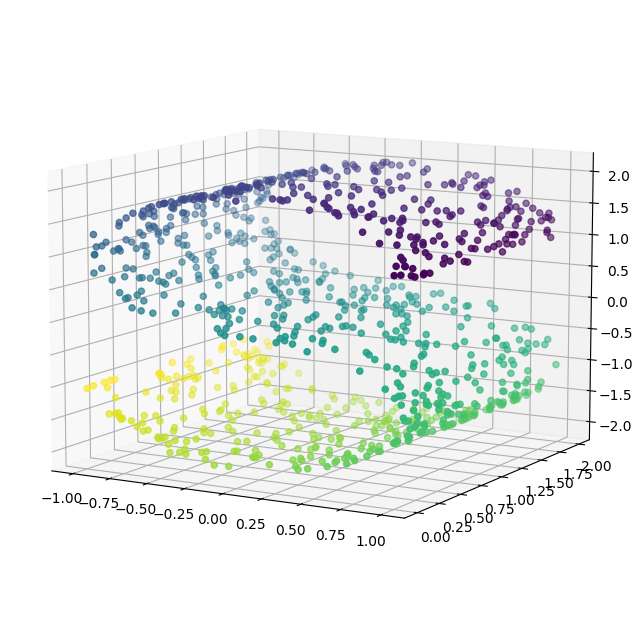

In [10]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X_S[:, 0], X_S[:, 1], X_S[:, 2], c=Y_S)
ax.view_init(10, -60);


In [11]:
from sklearn import manifold
n_neighbors=11
LLE = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='standard')
X_S_LLE = LLE.fit_transform(X_S)

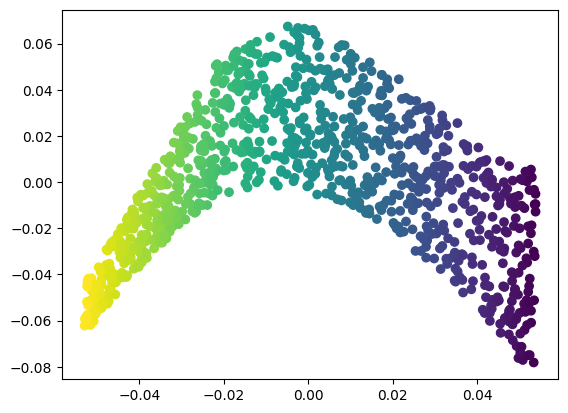

In [12]:
plt.scatter(X_S_LLE[:, 0], X_S_LLE[:, 1], c=Y_S);

### Swiss roll dataset

Demonstracija na swiss roll datasetu

In [13]:
from sklearn.datasets import make_swiss_roll

X_swiss_roll, Y_swiss_roll = make_swiss_roll(n_samples=2000)

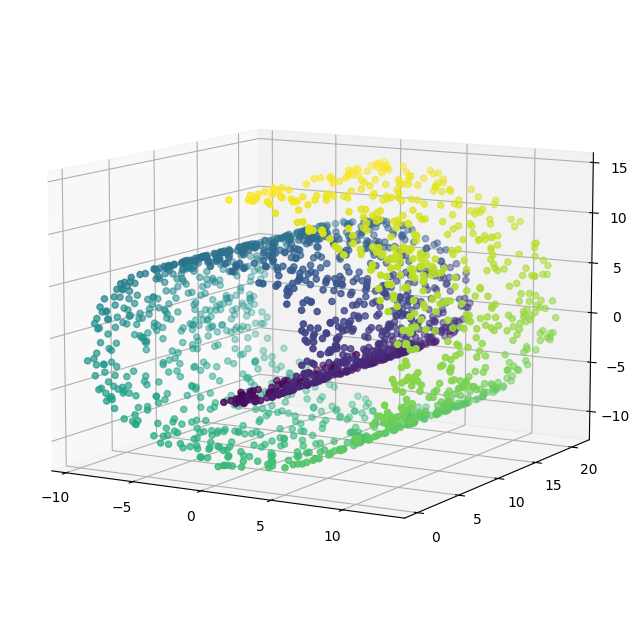

In [14]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X_swiss_roll[:, 0], X_swiss_roll[:, 1], X_swiss_roll[:, 2], c=Y_swiss_roll)
ax.view_init(10, -60);

In [15]:
LLE = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='standard')
X_swiss_roll_LLE = LLE.fit_transform(X_swiss_roll)

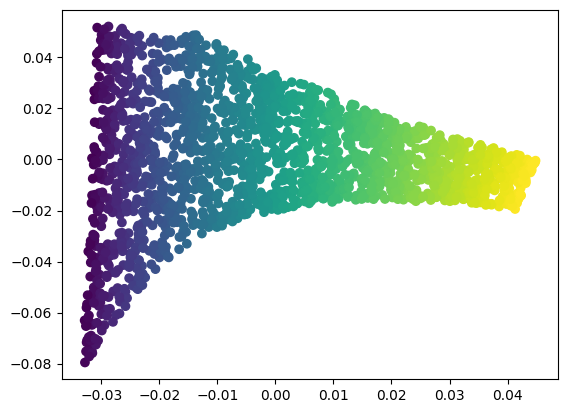

In [16]:
plt.scatter(X_swiss_roll_LLE[:, 0], X_swiss_roll_LLE[:, 1], c=Y_swiss_roll);

### Sfera

Demonstracija na sferi

In [17]:
from sklearn import manifold
from sklearn.utils import check_random_state

n_samples = 2000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])
X_sphere=np.array([x, y, z]).T
Y_sphere =p[indices]

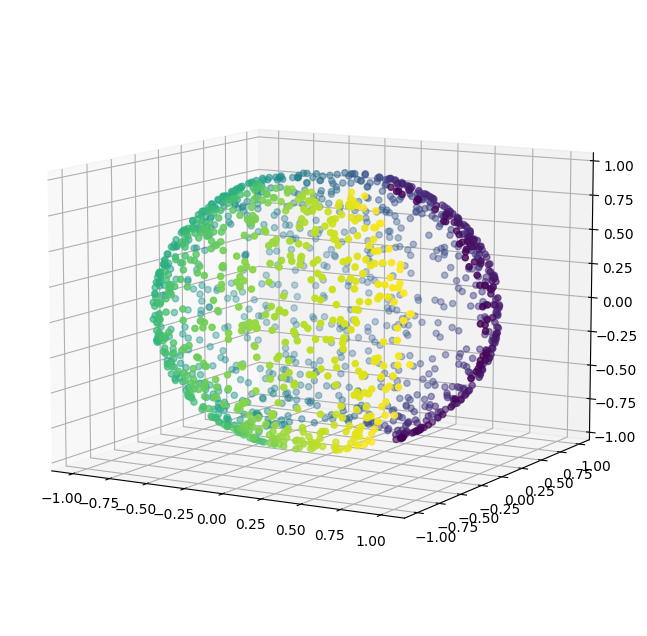

In [18]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X_sphere[:, 0], X_sphere[:, 1], X_sphere[:, 2], c=Y_sphere)
ax.view_init(10, -60);

In [19]:
n_neighbors = 15
LLE = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='standard')
X_sphere_LLE = LLE.fit_transform(X_sphere)

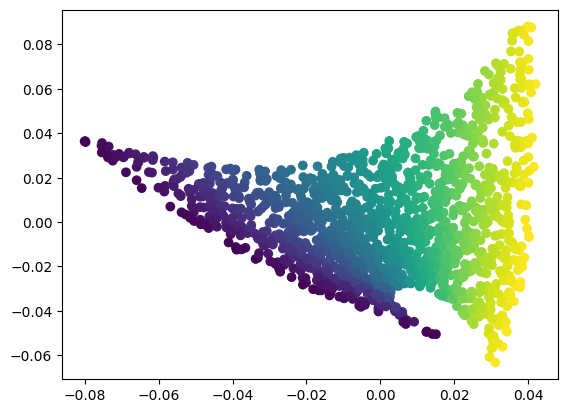

In [20]:
plt.scatter(X_sphere_LLE[:, 0], X_sphere_LLE[:, 1], c=Y_sphere);

### DIGITS dataset

In [21]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X_digits, Y_digits  = digits.data, digits. target

In [47]:
from sklearn import manifold
#n_components=embedding dimension d
n_neighbors = 12 #number of k nearest neighbors
locally_linear_embedding = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='standard')
X_digits_locally_linear = locally_linear_embedding.fit_transform(X_digits)

In [48]:
def plot_digits(X, algo=""):
    with plt.style.context(("seaborn", "ggplot")):
        fig = plt.figure(1, figsize=(10, 6))

        colors = ['red','green','orange','blue','purple','cyan','magenta', 'firebrick', 'lawngreen','indigo']
        for digit in range(0,6):
            plt.scatter(X[Y_digits==digit,0],X[Y_digits==digit,1], c = colors[digit], marker="$"+str(digit)+"$",s =50, alpha=0.5)
        plt.xlabel("New Feature 1")
        plt.ylabel("New Feature 2")
        plt.title(algo)
        plt.show()

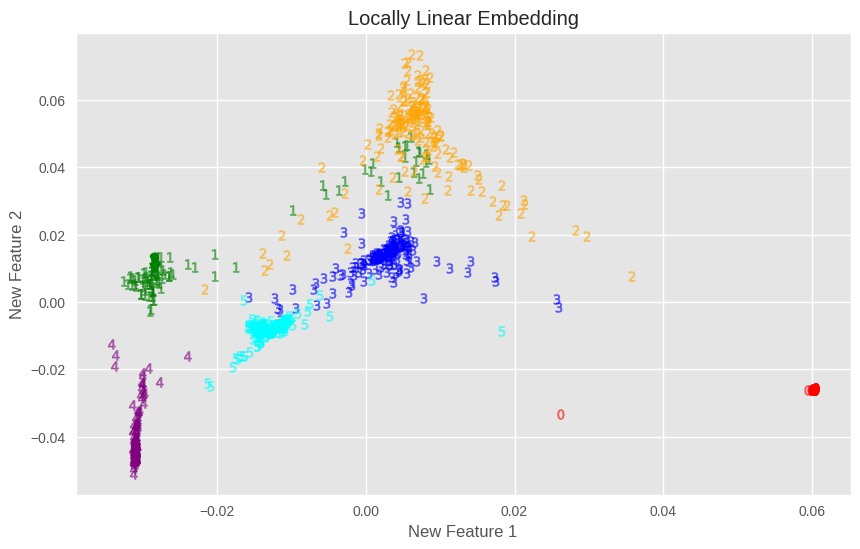

In [49]:
plot_digits(X_digits_locally_linear, "Locally Linear Embedding")